In [109]:
#1. Import data from excel and load it as Dataframe using Pandas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
class DataLoader: 
    def load_csv(self, file_path: str) -> pd.DataFrame: 
     return pd.read_csv(file_path)

loader = DataLoader()
df = loader.load_csv("sales_data.csv")
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [111]:
#2. Perform preprocessing operations as required - check datatypes, null values, etc

class DataPreprocessor:
    def preprocess(self, df: pd.DataFrame) -> pd.DataFrame:
        categorical_cols = [
            "Product_Category", "Sub_Category",
            "Product", "Country", "State"]

        for col in categorical_cols:
            if col in df.columns:
                df[col] = df[col].astype(str).str.strip()
        print("Missing values:")
        print(df.isnull().sum())
        print("\nData types:")
        print(df.dtypes)
        return df
preprocessor = DataPreprocessor()
df = preprocessor.preprocess(df)

Missing values:
Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

Data types:
Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object


In [112]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [113]:
#3. Save it as pickle object 

class DataSaver:
    def save_pickle(self, df: pd.DataFrame, file_path: str):
        df.to_pickle(file_path)
saver = DataSaver()
saver.save_pickle(df, "sales_data.pkl")
print("Pickle file saved successfully")

Pickle file saved successfully


In [114]:
#4. Perform data analysis and visualize them using seaborn/matplotlib

class DataAnalyzer:
    def summary_statistics(self, df: pd.DataFrame) -> pd.DataFrame:
        return df.describe()

    def product_counts(self, df: pd.DataFrame) -> dict:
        return {
            "Product_Category": df["Product_Category"].nunique(),
            "Sub_Category": df["Sub_Category"].nunique(),
            "Product": df["Product"].nunique()}
analyzer = DataAnalyzer()
summary = analyzer.summary_statistics(df)
summary

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [115]:
print (df.columns)

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')


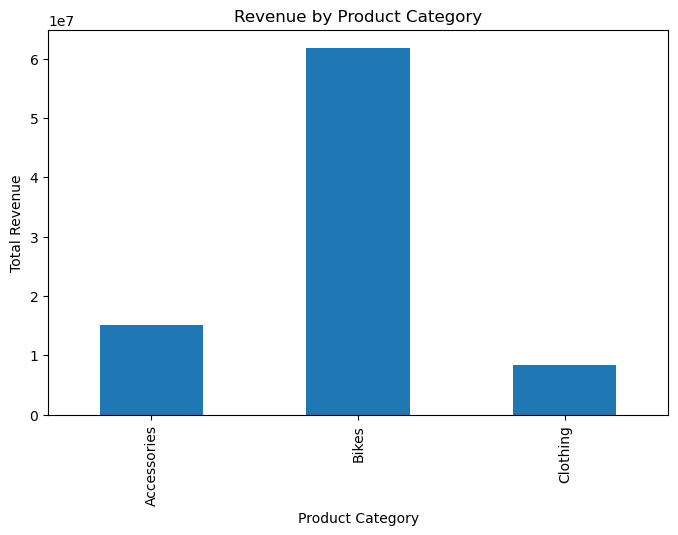

In [116]:
plt.figure(figsize=(8, 5))
df.groupby("Product_Category")["Revenue"].sum().plot(kind="bar")
plt.title("Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.show()

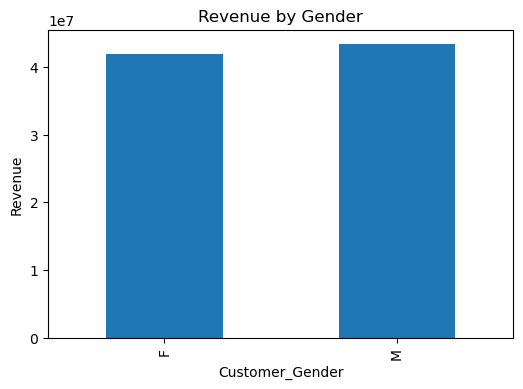

In [117]:
plt.figure(figsize=(6, 4))
df.groupby("Customer_Gender")["Revenue"].sum().plot(kind="bar")
plt.title("Revenue by Gender")
plt.xlabel("Customer_Gender")
plt.ylabel("Revenue")
plt.show()

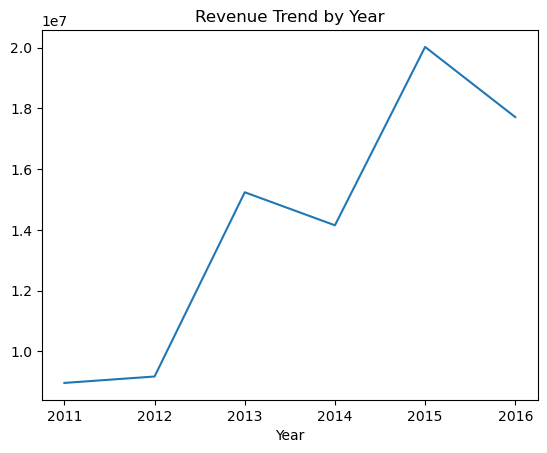

In [119]:
df.groupby("Year")["Revenue"].sum().plot(kind="line")
plt.title("Revenue Trend by Year")
plt.show()


In [159]:
#5. Display Data using visualisations/data analysis. Save the visualizations as a jpg/png for future reference. 
#a) Calculate summary statistics (mean, median, etc.) for numeric columns

summary_statistics = df.describe()

# Display summary statistics
print("Summary Statistics for Numeric Columns:")
print(summary_statistics)

median_values = df.median(numeric_only=True)

print("\nMedian Values for Numeric Columns:")
print(median_values)


summary_statistics.to_csv("outputs/summary_statistics.csv")

# Save summary statistics as Pickle
summary_statistics.to_pickle("outputs/summary_statistics.pkl")

print("\nSummary statistics saved successfully.")

Summary Statistics for Numeric Columns:
                                Date            Day     Month           Year  \
count                         113036  113036.000000  113036.0  113036.000000   
mean   2014-05-27 14:05:57.210092288      15.665753       1.0    2014.401739   
min              2011-01-01 00:00:00       1.000000       1.0    2011.000000   
25%              2013-01-01 00:00:00       8.000000       1.0    2013.000000   
50%              2014-01-01 00:00:00      16.000000       1.0    2014.000000   
75%              2016-01-01 00:00:00      23.000000       1.0    2016.000000   
max              2016-01-01 00:00:00      31.000000       1.0    2016.000000   
std                              NaN       8.781567       0.0       1.272510   

        Customer_Age  Order_Quantity      Unit_Cost     Unit_Price  \
count  113036.000000   113036.000000  113036.000000  113036.000000   
mean       35.919212       11.901660     267.296366     452.938427   
min        17.000000        1

In [120]:
#b) Find the total number of Product_Category, Sub_Category, Product
class DataAnalyzer:
    def count_products(self, df):
        return {
            "Product_Category": df["Product_Category"].nunique(),
            "Sub_Category": df["Sub_Category"].nunique(),
            "Product": df["Product"].nunique()
        }

analyzer = DataAnalyzer()
counts = analyzer.count_products(df)
print(counts)


{'Product_Category': 3, 'Sub_Category': 17, 'Product': 130}


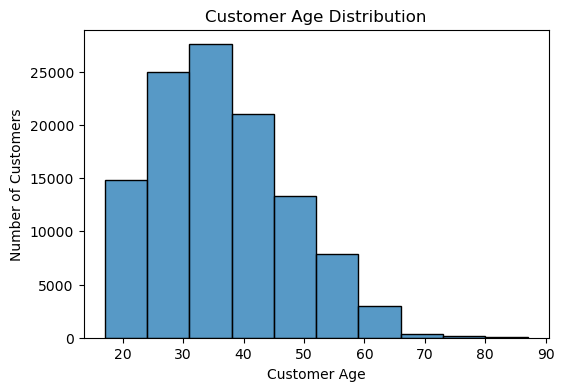

In [121]:
#c) Create a histogram of Customer_Age to observe the age distribution.

plt.figure(figsize=(6, 4))
sns.histplot(df["Customer_Age"], bins=10)
plt.title("Customer Age Distribution")
plt.xlabel("Customer Age")
plt.ylabel("Number of Customers")
plt.show()


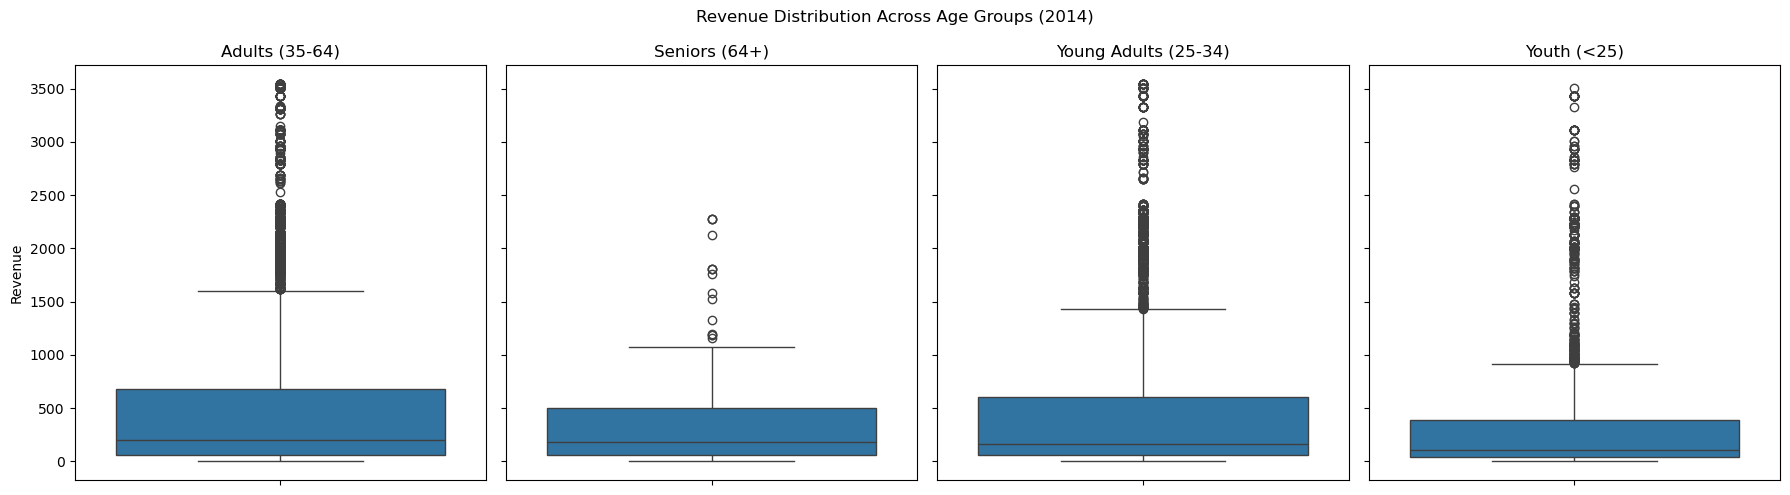

In [157]:
#[Advanced] Create 5-subplots in which each subplot is a box plot is a revenue distribution across each age group for a year.

year = 2014
year_df = df[df["Year"] == year]

age_groups = sorted(year_df["Age_Group"].unique())

fig, axes = plt.subplots(1, len(age_groups), figsize=(18, 5), sharey=True)

for ax, age_group in zip(axes, age_groups):
    sns.boxplot(
        y=year_df[year_df["Age_Group"] == age_group]["Revenue"],
        ax=ax
    )
    ax.set_title(age_group)
    ax.set_xlabel("")
    ax.set_ylabel("Revenue")

fig.suptitle(f"Revenue Distribution Across Age Groups ({year})")
plt.tight_layout()
plt.savefig("outputs/plots/revenue_distribution_by_age_group_2014.png")
plt.show()

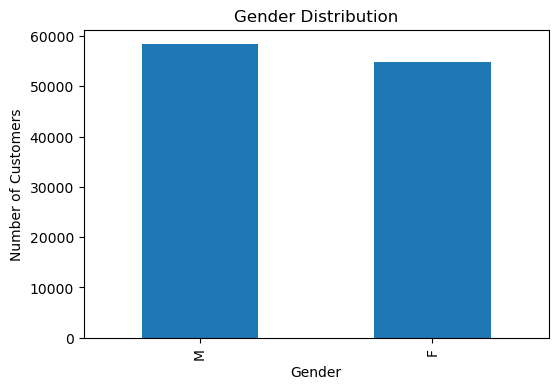

In [123]:
#e) Create a pie chart or bar chart to visualise gender distributionplt.

figure(figsize=(6, 4))
df["Customer_Gender"].value_counts().plot(kind="bar")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.show()

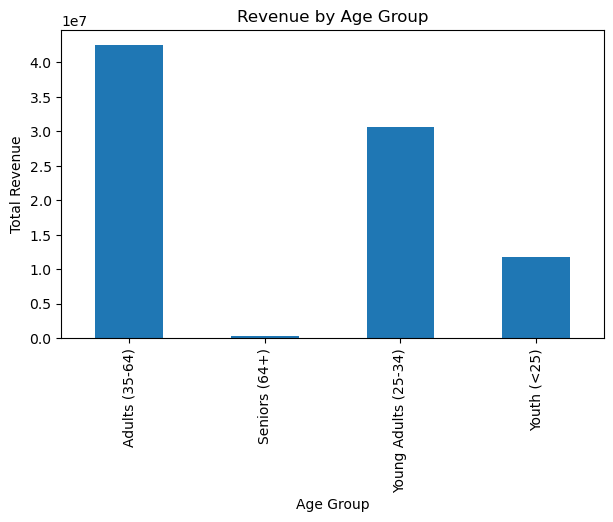

In [124]:
# f) Use a bar chart to show the relationship between Age_Group and Revenue. Find which age group generates the most revenue

revenue_by_age_group = df.groupby("Age_Group")["Revenue"].sum()
plt.figure(figsize=(7, 4))
revenue_by_age_group.plot(kind="bar")
plt.title("Revenue by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Revenue")

In [126]:
highrevenue_age_group = revenue_by_age_group.idxmax()
high_revenue = revenue_by_age_group.max()

print("Age group with highest revenue:", highrevenue_age_group)
print("Revenue generated:", high_revenue)

Age group with highest revenue: Adults (35-64)
Revenue generated: 42584153


In [129]:
#g) Identify the most and least profitable Product_Category: Group by Product_Category and sum the Profit.
#Create a horizontal bar chart showing profits by category.

profit_by_category = df.groupby("Product_Category")["Profit"].sum()
most_profitable = profit_by_category.idxmax()
least_profitable = profit_by_category.idxmin()

print("Most profitable Product Category:", most_profitable)
print("Least profitable Product Category:", least_profitable)

Most profitable Product Category: Bikes
Least profitable Product Category: Clothing


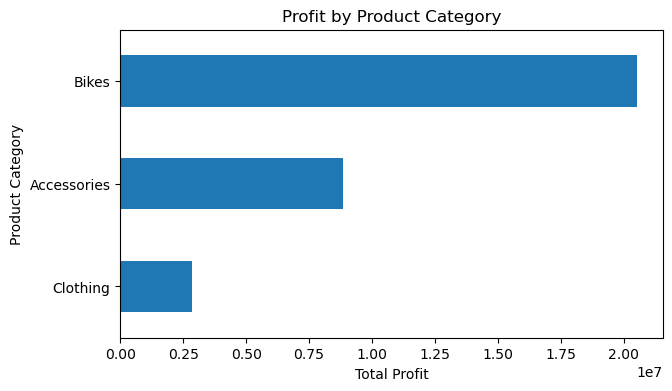

In [130]:
plt.figure(figsize=(7, 4))
profit_by_category.sort_values().plot(kind="barh")
plt.title("Profit by Product Category")
plt.xlabel("Total Profit")
plt.ylabel("Product Category")
plt.show()

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
class RevenueProfitTrend:
    def __init__(self, df: pd.DataFrame):
        self.df = df.copy()

    def clean_month_column(self):
        self.df["Month"] = pd.to_datetime(
            self.df["Month"], format="mixed"
        ).dt.month
    def create_date_column(self):
        self.df["Date"] = pd.to_datetime(
            self.df[["Year", "Month"]].assign(DAY=1)
        )
    def filter_by_date(self, start_year, start_month, end_year, end_month):
        start_date = pd.to_datetime(f"{start_year}-{start_month}-01")
        end_date = pd.to_datetime(f"{end_year}-{end_month}-01")

        return self.df[
            (self.df["Date"] >= start_date) &
            (self.df["Date"] <= end_date)
        ]
    def plot_trends(self, filtered_df):
        monthly_trends = (
            filtered_df
            .groupby("Date")[["Revenue", "Profit"]]
            .sum()
            .reset_index()
        )
        plt.figure(figsize=(8, 5))
        plt.plot(monthly_trends["Date"], monthly_trends["Revenue"], label="Revenue")
        plt.plot(monthly_trends["Date"], monthly_trends["Profit"], label="Profit")
        plt.title("Revenue and Profit Trend Over Time")
        plt.xlabel("Month")
        plt.ylabel("Amount")
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

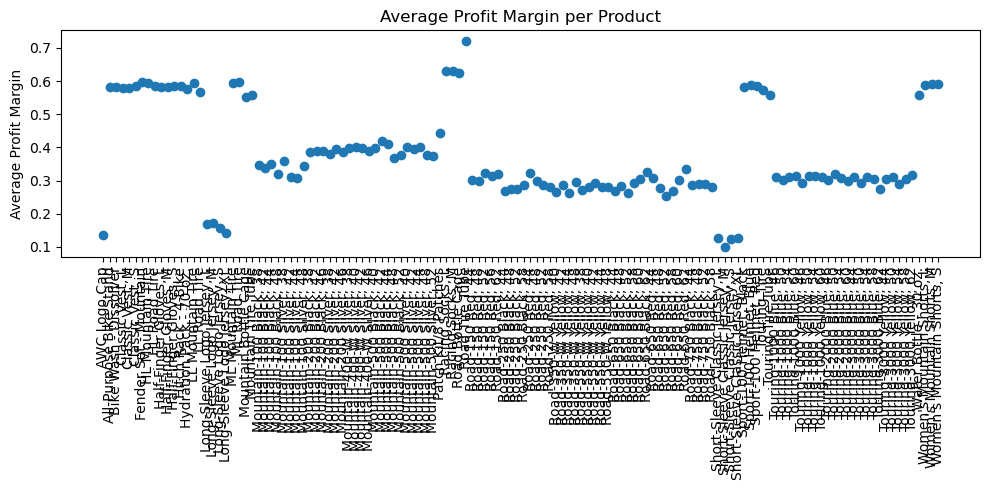

In [158]:
#i) Calculate the average profit margin per product. Plot using scatter plot

df["Profit_Margin"] = df["Profit"] / df["Revenue"]
avg_profit_margin = (
    df.groupby("Product")["Profit_Margin"]
    .mean()
    .reset_index())
plt.figure(figsize=(10, 5))
plt.scatter(
    avg_profit_margin["Product"],
    avg_profit_margin["Profit_Margin"])

plt.title("Average Profit Margin per Product")
plt.xlabel("product")
plt.ylabel("Average Profit Margin")

plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("outputs/plots/avg_profit_margin_per_product.png")
plt.show()

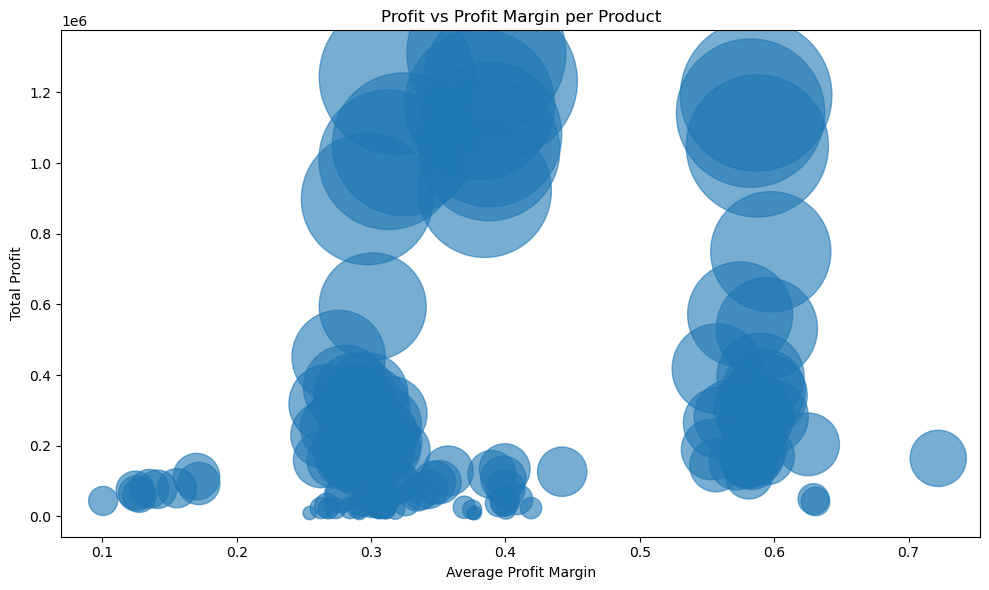

In [155]:
#J)[Advanced: Plot the above profit margin per product with profit amount. Scatter plot with size of marker as an indicator of profit]

df["Profit_Margin"] = df["Profit"] / df["Revenue"]

product_metrics = (
    df.groupby("Product")
    .agg(
        Avg_Profit_Margin=("Profit_Margin", "mean"),
        Total_Profit=("Profit", "sum")  )
    .reset_index())


plt.figure(figsize=(10, 6))

plt.scatter(
    product_metrics["Avg_Profit_Margin"],
    product_metrics["Total_Profit"],
    s=product_metrics["Total_Profit"] / 100,  # scale marker size
    alpha=0.6)

plt.title("Profit vs Profit Margin per Product")
plt.xlabel("Average Profit Margin")
plt.ylabel("Total Profit")

plt.tight_layout()
plt.show()

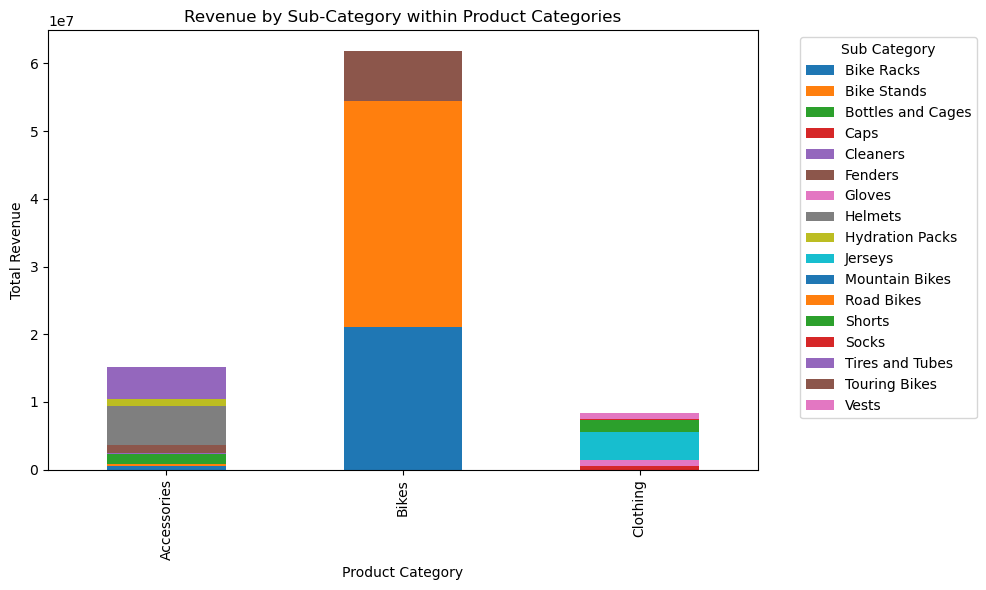

In [146]:
# k) Examine which Sub_Category within a Product_Category performs best in terms of Profit or Revenue. Group by Product_Category and Sub_Category
# to calculate totals. Create a stacked bar chart of revenue/profit by sub-category within categories
revenue_by_subcategory = (
    df.groupby(["Product_Category", "Sub_Category"])["Revenue"]
    .sum()
    .reset_index())
revenue_pivot = revenue_by_subcategory.pivot(
    index="Product_Category",
    columns="Sub_Category",
    values="Revenue")

revenue_pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6))
plt.title("Revenue by Sub-Category within Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.legend(
    title="Sub Category",
    bbox_to_anchor=(1.05, 1),
    loc="upper left")
plt.tightLayout()
plt.show()

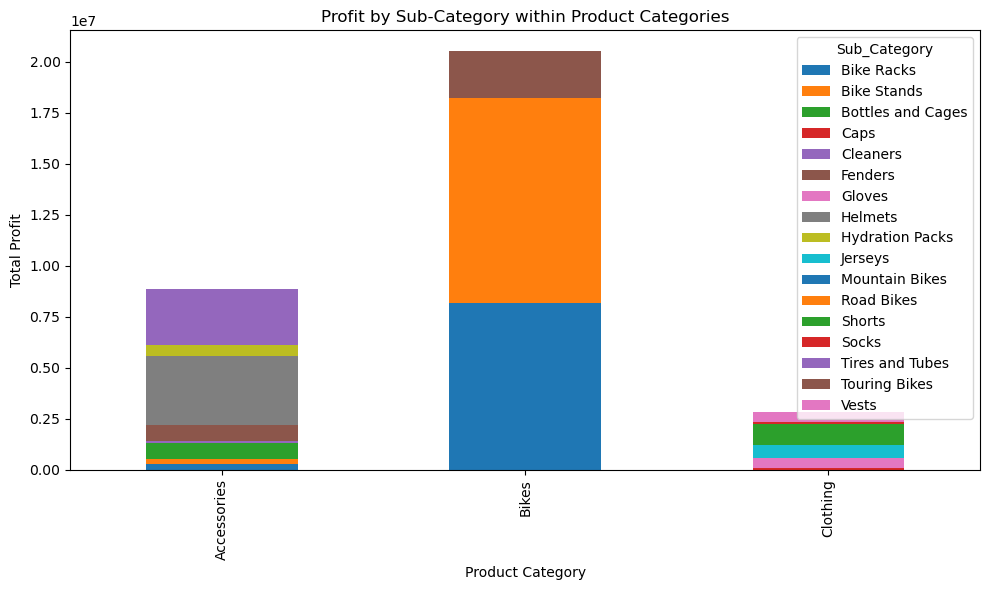

In [147]:
#Profit
profit_by_subcategory = (
    df.groupby(["Product_Category", "Sub_Category"])["Profit"]
    .sum()
    .reset_index())

profit_pivot = profit_by_subcategory.pivot(
    index="Product_Category",
    columns="Sub_Category",
    values="Profit")

profit_pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6))

plt.title("Profit by Sub-Category within Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()



In [152]:
#Revenue
revenue_by_subcategory.sort_values(
    by="Revenue", ascending=False).head()

,Product_Category,Sub_Category,Revenue
9,Bikes,Road Bikes,33363061
8,Bikes,Mountain Bikes,21123526
10,Bikes,Touring Bikes,7295547
5,Accessories,Helmets,5741081
7,Accessories,Tires and Tubes,4670902


In [149]:
#Profit
profit_by_subcategory.sort_values(
    by="Profit", ascending=False).head()

,Product_Category,Sub_Category,Profit
9,Bikes,Road Bikes,10078875
8,Bikes,Mountain Bikes,8160463
5,Accessories,Helmets,3380203
7,Accessories,Tires and Tubes,2727713
10,Bikes,Touring Bikes,2279938
